# Chapter 5. Biophyshical Machine Learning

## Protein Structures

#### At present, there are 3 methods that could help us determine the structures of proteins:
   1. **X-ray crystallography**
       * X-ray is the oldest method, and still the most widely used.
       * Crystallography involves grwoing a crystal of the protein of interest. X-rays are then shone on the crystal, the scattered light is measured, and the results are analyzed to work out the structure of the individual molecules.
       * Limitation: 
           1. slow
           2. expensive
           3. Many proteins are flexible and can take on a range of structures, but crystallography only produces a single unmoving snapshot. 
           
           
   2. **nuclear magnetic resonance (NMR)**
       * Second most common method. 
       * NMR produces an ensemble of structures representing the range of shapes the protein cantake on in solution. --VERY IMPORTANT because it provides information about how the protein can move. 
       * Limiation: 
           1. It requires a highly concentrated solution
   
   
   3. **cryo-electronmicroscopy (cryo-EM)**
       * It involves rapidly freezing protein molecules, then imaging them with an electron microscope.
       * Unlike crystallography and NMR, it works for large proteins that do not crystallize.

## Grid Featurization

#### Hydrogen Bond:

* When a hydrogen atom is covalently bonded to a more electronegative atom such as oxygen or nitrogen, the shared electrons spent most of their time closer to the more electronegative atom. This leaves the hydrogen with a net positive charge. 


* Becuase hydrogen atoms are so small, they can get very close to other atoms, leading to a strong electrostatic attraction. This makes **hydrogen bonds one of the strongest noncovalent interactions**


* The **RdkitGridFeaturizer** attempts to count the hydrogen bonds present in a structure by checking for paris of protein/ligand atoms of the right types that are suitably close to one another. 

#### Salt Bridges:

* A salt bridge is a noncovalent attraction between two amino acids, where one has a positive charge and the other has a negative charge. It combines both ionic bonding and hydrogen bonding. 


* The grid featurizer attempts to detect salt bridges by explicitly checking for pairs of amino acids (e.g. glutamic acid and lysine) that are known to form such interactions. 

#### Pi-stacking Interactions

* Pi-stacking interactions are a form of noncovalent interaction between *aromatic rings* (flat, ring-shaped structure)


* Pi-stacking interactions occur when two aromatic rings "stack" on top of each other. Such stacking interactions, like salt bridges, can help stabilize various macro-molecular structures. 


* **Importantly**, pi-stacking interactions can be found in ligand-protein interactions, since aromatic rings are often found in small molecules. 


* Grid featurizer counts these interactions by detecting the presence of aromatic rings and checking for the distances between their centroids and the angles between their two planes.

## The PDBBind Case Study

* binding free energy prediction 

In [14]:
import nglview as nv

# view = nv.show_pdbid("2D3U") # load "2D3U" from RCSB PDB and display viewer widget
view = nv.show_file("2D3U.pdb")
view.representations = [
    {"type": "cartoon", "params": {
        "sele": "protein", "color": "residueindex"
    }},
    {"type": "ball+stick", "params": {
        "sele": "ligand"
    }}
]

view

NGLWidget()

![](https://i.imgur.com/QPaxFNU.png)

####  Step 1. Featurizing the PDBBind Dataset

In [31]:
import deepchem as dc

grid_featurizer = dc.feat.RdkitGridFeaturizer(
                    voxel_width = 2.0, #sets the size of voxels making up the grid to 2 angstroms. 
                    feature_types=['hbond','salt_bridge','pi_stack','cation_pi','ecfp','splif'],
                    sanitize = True, #asks the featurizer to try to clean up any structures it is given. 
                    flatten = True) #askss the featurizer to output a one-dimensional feature vector for each input structre. 

In [33]:
tasks, datasets, transformers = dc.molnet.load_pdbbind(featurizer=grid_featurizer, splitter='random', subset='core')
train_dataset, valid_dataset, test_dataset = datasets

In [43]:
sklearn_model = RandomForestRegressor(n_estimators=100)
model= dc.models.SklearnModel(sklearn_model)
model.fit(train_dataset)

ValueError: Found array with 0 feature(s) (shape=(3881, 0)) while a minimum of 1 is required.

#### Step 2. Build our model 

* Frist we will train a classical *random forest* model.

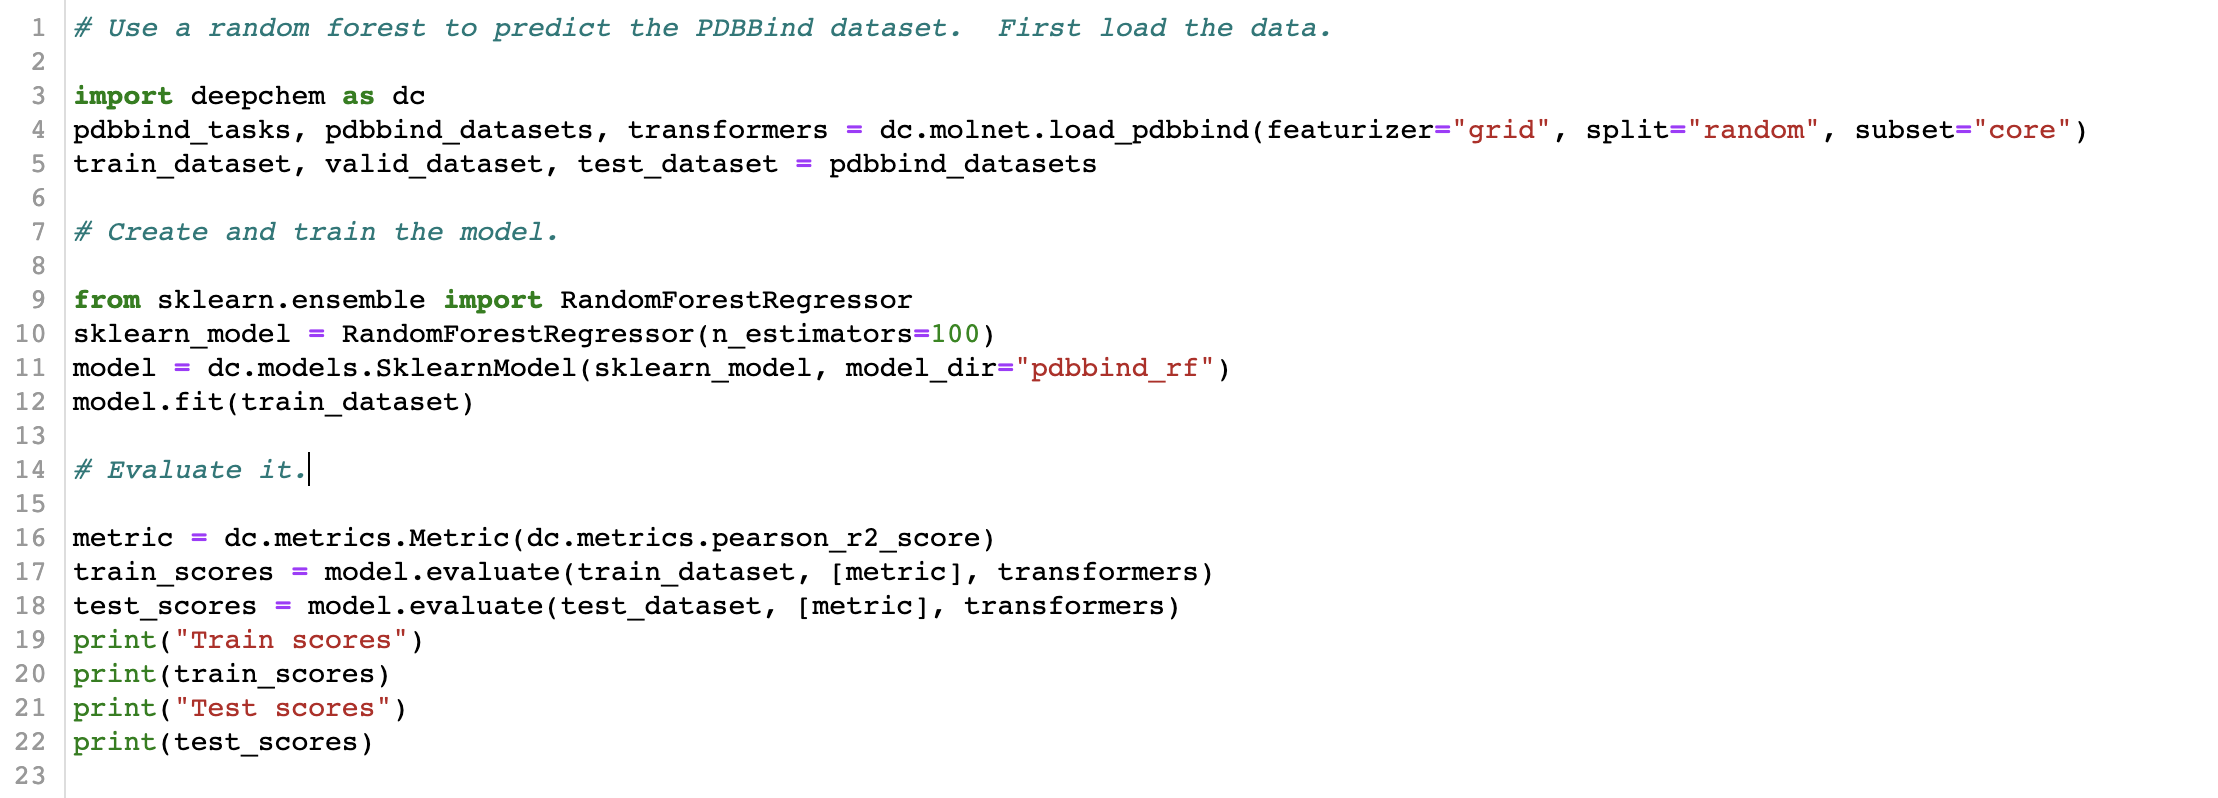

In [41]:
from IPython.display import Image
Image(filename='chapter5rf.png')

* As an alternative, we will also try building a neural network for predicting protein-ligand binding. 

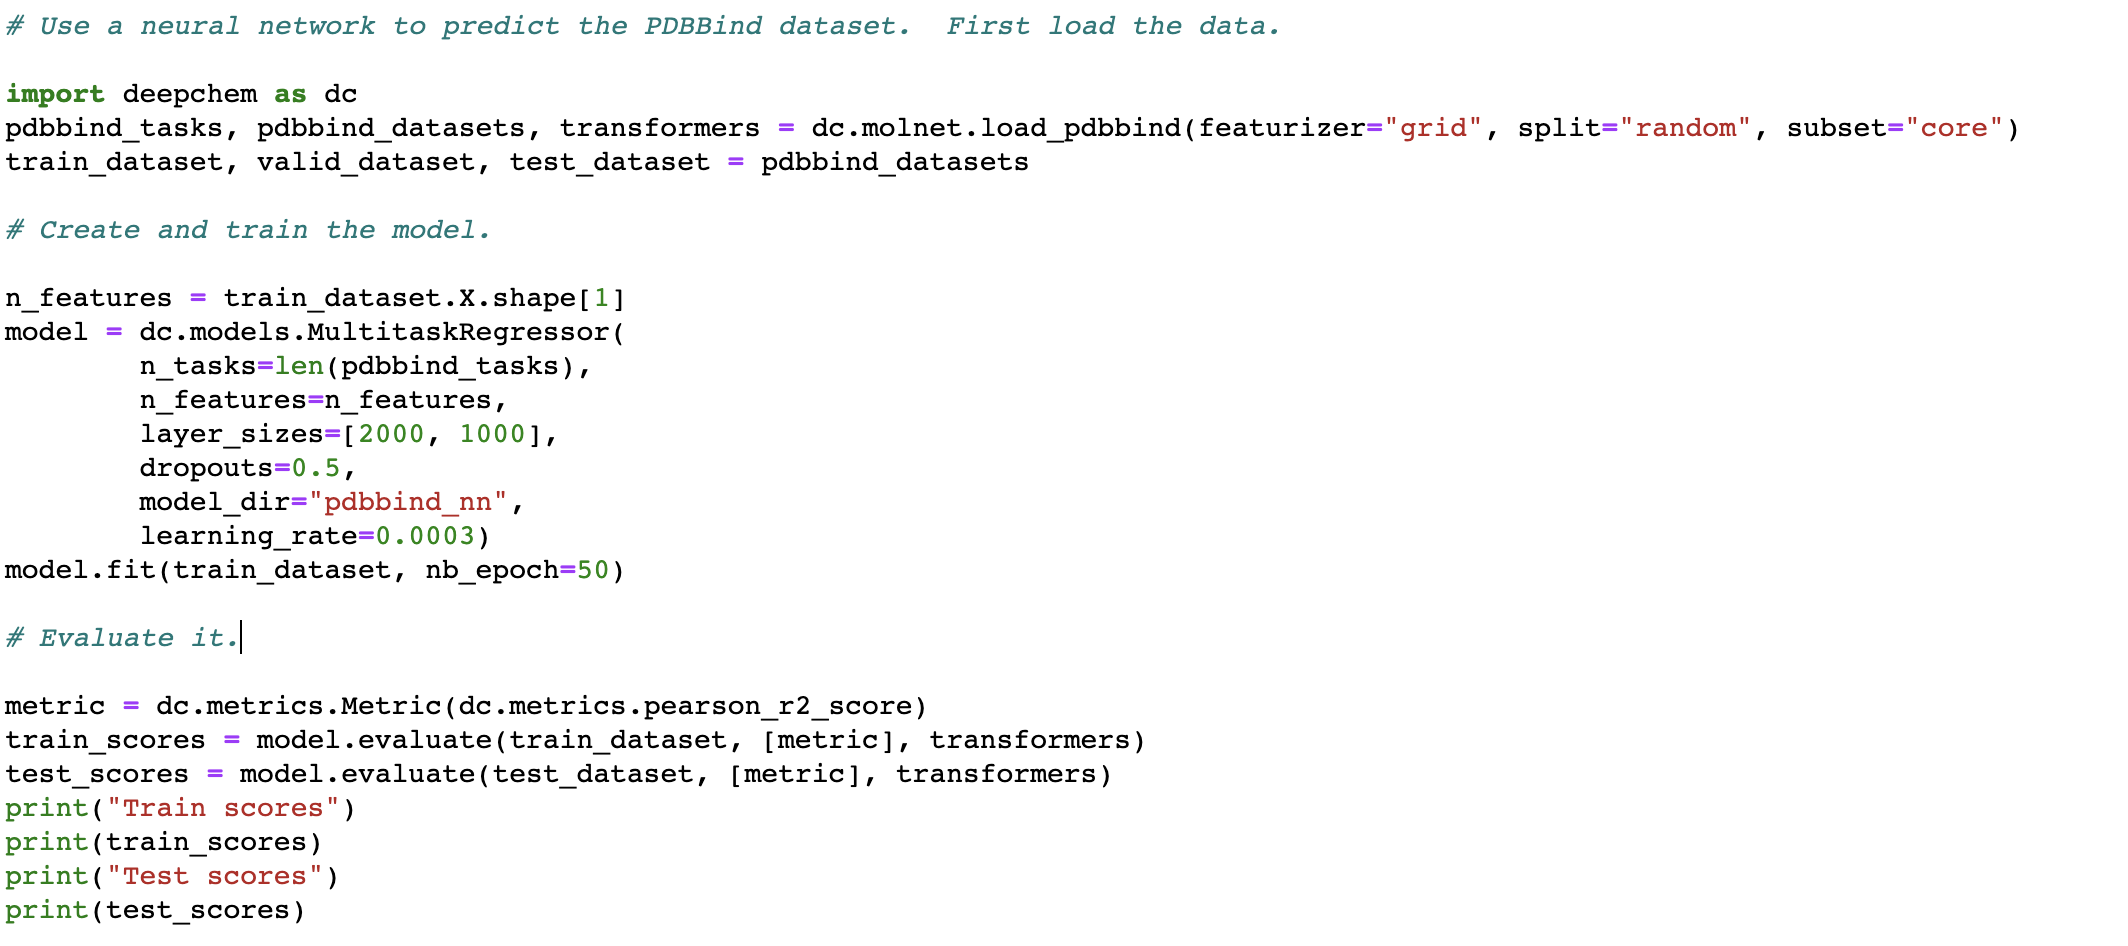

In [42]:
Image(filename='chapter5nn.png')